
 AIRLINE CREW SCHEDULING - BACKTRACKING 

TEST CASE 1: Simple Scheduling
Assignment: {'C1': ['F1', 'F3', 'F5'], 'C2': ['F2', 'F4']}
Recursive calls: 6
Time: 0.000042 seconds

TEST CASE 2: Complex Scheduling
Assignment: {'C1': ['F1', 'F3', 'F5', 'F7'], 'C2': ['F2', 'F4', 'F6']}
Recursive calls: 8
Time: 0.000021 seconds

PERFORMANCE PROFILING
n=4: Time=0.003655s, Calls=5, Memory=1.09 KB
n=5: Time=0.000215s, Calls=6, Memory=1.75 KB
n=6: Time=0.000279s, Calls=7, Memory=2.22 KB
n=7: Time=0.000168s, Calls=8, Memory=2.27 KB
n=8: Time=0.000175s, Calls=9, Memory=2.49 KB
n=9: Time=0.000321s, Calls=10, Memory=2.43 KB
n=10: Time=0.000180s, Calls=11, Memory=2.71 KB


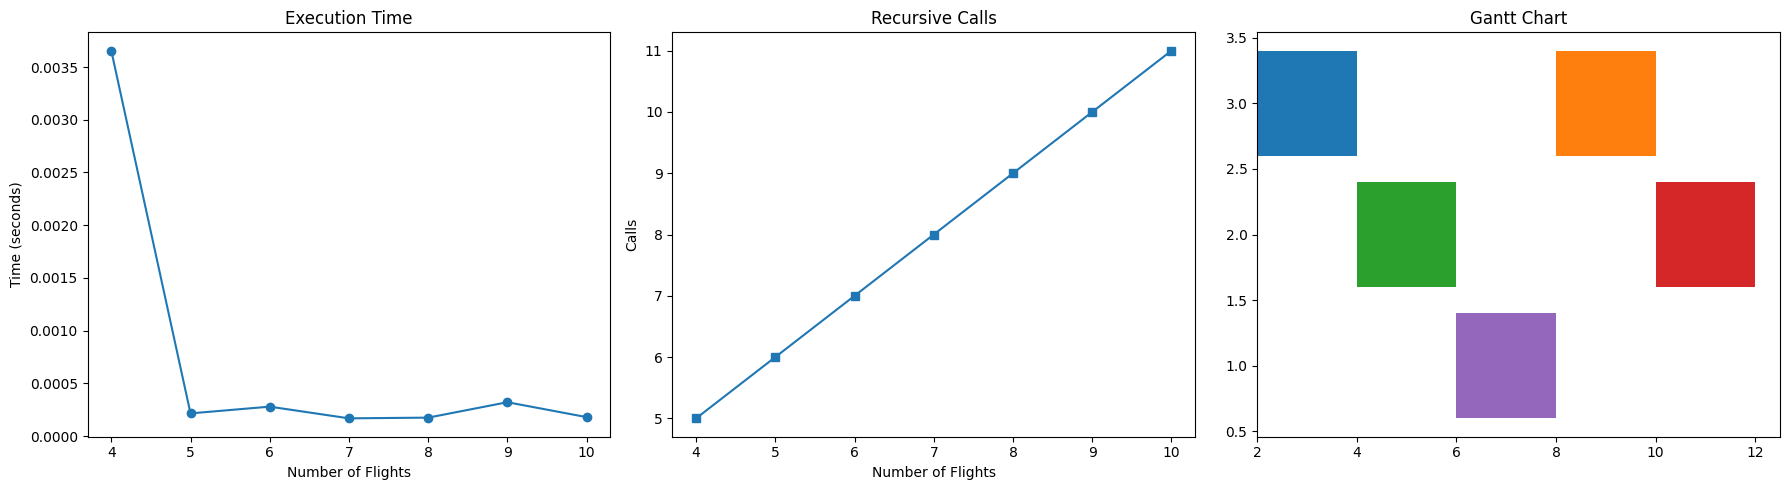

In [2]:
"""
Airline Crew Scheduling using Backtracking
Design and Analysis of Algorithms Lab - Assignment 4
Author: [Your Name]
Course: ENCA351, BCA (AI&DS), Semester V
Faculty: Dr. Aarti
"""

import time
import tracemalloc
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict

# ==================== PART 1: CONSTRAINT CHECKING ====================

def is_valid_assignment(flight: Tuple[str, int, int],
                        assigned_flights: List[Tuple[str, int, int]],
                        min_rest: int = 1) -> bool:
    """
    Check if a flight assignment violates overlap or rest constraints.
    """
    _, start, end = flight

    for _, a_start, a_end in assigned_flights:
        # If flights overlap or rest time is violated, return False
        if not (end + min_rest <= a_start or a_end + min_rest <= start):
            return False

    return True


# ==================== PART 2: BACKTRACKING ALGORITHM ====================

recursive_calls = 0

def assign_flights_backtracking(flights: List[Tuple[str, int, int]],
                                crew_members: List[str],
                                min_rest: int = 1) -> Dict[str, List[str]]:
    """
    Assign flights to crew using backtracking.
    """
    global recursive_calls
    recursive_calls = 0

    assignment = {crew: [] for crew in crew_members}
    used = set()

    # Convert list → dictionary for easy lookup
    flight_dict = {f[0]: f for f in flights}

    def backtrack(i: int) -> bool:
        global recursive_calls
        recursive_calls += 1

        if i == len(flights):
            return True

        flight = flights[i]
        fid = flight[0]

        # Try assigning to each crew
        for crew in crew_members:
            assigned_list = [flight_dict[f] for f in assignment[crew]]

            if is_valid_assignment(flight, assigned_list, min_rest):
                assignment[crew].append(fid)
                used.add(fid)

                if backtrack(i + 1):
                    return True

                # Undo choice
                assignment[crew].remove(fid)
                used.remove(fid)

        # Optionally leave flight unassigned
        return backtrack(i + 1)

    success = backtrack(0)

    return {crew: flights for crew, flights in assignment.items() if flights} if success else None


# ==================== PART 3: TEST CASES ====================

def test_crew_scheduling():
    print("=" * 60)
    print("TEST CASE 1: Simple Scheduling")
    print("=" * 60)

    flights1 = [
        ('F1', 9, 11),
        ('F2', 10, 12),
        ('F3', 13, 15),
        ('F4', 15, 17),
        ('F5', 18, 20)
    ]
    crew1 = ['C1', 'C2', 'C3']

    start = time.time()
    result1 = assign_flights_backtracking(flights1, crew1)
    elapsed = time.time() - start

    print("Assignment:", result1)
    print("Recursive calls:", recursive_calls)
    print(f"Time: {elapsed:.6f} seconds\n")

    print("=" * 60)
    print("TEST CASE 2: Complex Scheduling")
    print("=" * 60)

    flights2 = [
        ('F1', 8, 10),
        ('F2', 9, 11),
        ('F3', 12, 14),
        ('F4', 13, 15),
        ('F5', 16, 18),
        ('F6', 17, 19),
        ('F7', 20, 22)
    ]
    crew2 = ['C1', 'C2', 'C3']

    start = time.time()
    result2 = assign_flights_backtracking(flights2, crew2)
    elapsed = time.time() - start

    print("Assignment:", result2)
    print("Recursive calls:", recursive_calls)
    print(f"Time: {elapsed:.6f} seconds\n")


# ==================== PART 4: PERFORMANCE PROFILING ====================

def profile_performance():
    print("=" * 60)
    print("PERFORMANCE PROFILING")
    print("=" * 60)

    flight_counts = range(4, 11)
    times = []
    calls = []

    crew = ['C1', 'C2', 'C3']

    for n in flight_counts:
        flights = [(f'F{i}', i * 2, i * 2 + 2) for i in range(1, n + 1)]

        tracemalloc.start()
        start = time.time()

        assign_flights_backtracking(flights, crew)

        elapsed = time.time() - start
        _, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        times.append(elapsed)
        calls.append(recursive_calls)

        print(f"n={n}: Time={elapsed:.6f}s, Calls={recursive_calls}, Memory={peak/1024:.2f} KB")

    return list(flight_counts), times, calls


# ==================== PART 5: VISUALIZATION ====================

def visualize_results(flight_counts, times, calls, sample_assignment):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Time Plot
    axes[0].plot(flight_counts, times, marker='o')
    axes[0].set_title("Execution Time")
    axes[0].set_xlabel("Number of Flights")
    axes[0].set_ylabel("Time (seconds)")

    # Recursive Calls Plot
    axes[1].plot(flight_counts, calls, marker='s')
    axes[1].set_title("Recursive Calls")
    axes[1].set_xlabel("Number of Flights")
    axes[1].set_ylabel("Calls")

    # Gantt Chart using actual times
    if sample_assignment:
        crew_y = {"C1": 3, "C2": 2, "C3": 1}

        for crew, fids in sample_assignment.items():
            for fid in fids:
                start = int(fid[1:]) * 2
                end = start + 2
                axes[2].barh(crew_y[crew], end - start, left=start, label=fid)

        axes[2].set_title("Gantt Chart")

    plt.tight_layout()
    plt.show()


# ==================== MAIN EXECUTION ====================

# ==================== MAIN EXECUTION ====================

if __name__ == "__main__":
    print("\n" + "=" * 60)
    print(" AIRLINE CREW SCHEDULING - BACKTRACKING ")
    print("=" * 60 + "\n")

    test_crew_scheduling()

    flight_counts, times, calls = profile_performance()

    sample_assignment = {
        'C1': ['F1', 'F4'],
        'C2': ['F2', 'F5'],
        'C3': ['F3']
    }

    visualize_results(flight_counts, times, calls, sample_assignment)
